# Exploratory data analysis of both datasets

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import json
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt

# Reviews dataset
#### This dataset contains purchases or more precisely reviews of users

In [2]:
reviews_json_file_path = '/kaggle/input/pet-supplies-json/Pet_Supplies.json'

with open(reviews_json_file_path, 'r') as file:
    first_line = file.readline().strip()
    first_row = json.loads(first_line)
    print(json.dumps(first_row, indent=4))

    file.seek(0)

    for line in file:
        row = json.loads(line.strip())
        if "image" in row and "style" in row:
            print(json.dumps(row, indent=4))
            break

{
    "overall": 3.0,
    "vote": "5",
    "verified": true,
    "reviewTime": "09 27, 2007",
    "reviewerID": "A13K4OZKAAHOXS",
    "asin": "0972585419",
    "reviewerName": "100indecisions",
    "reviewText": "Either my bird can't talk, or it really doesnt want to say \"I love you.\" The disk has a lot of good phrases, but some of them will probably never be used (uh, \"Whaaaaaaaaats up?\").",
    "summary": "Still waiting for it to work...",
    "unixReviewTime": 1190851200
}
{
    "image": [
        "https://images-na.ssl-images-amazon.com/images/I/718O7D+IQ6L._SY88.jpg"
    ],
    "overall": 5.0,
    "vote": "29",
    "verified": true,
    "reviewTime": "02 20, 2018",
    "reviewerID": "A1WQVHPSA81G85",
    "asin": "1612231977",
    "style": {
        "Color:": " #3 GREEN- 25 to 80 Pounds (1 1/8\" *4.5mm)"
    },
    "reviewerName": "Jessica Novik",
    "reviewText": "WOW, these are amazing. I have had multiple great workouts. I was worried about what strength to get but it came 

#### Read the dataset into a Pandas DataFrame and print the number of rows and columns

In [3]:
df = pd.read_json(reviews_json_file_path, lines=True)

print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 6542483
Number of columns in the dataset: 12


#### Displaying the first 5 rows of the dataset

In [4]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,3,5,True,"09 27, 2007",A13K4OZKAAHOXS,0972585419,100indecisions,"Either my bird can't talk, or it really doesnt...",Still waiting for it to work...,1190851200,NaN,NaN
1,4,6,True,"08 25, 2007",A1DWYEX4P7GB7Z,0972585419,J. Weaver,The CD is a good idea for teaching a bird to s...,Feathered Phonics volume 1,1188000000,NaN,NaN
2,4,5,True,"02 20, 2007",A3NVN97YJSKEPC,0972585419,Theresa Ehrhardt,good cd to teach birds to talk and learn new w...,bird cd,1171929600,NaN,NaN
3,1,NaN,True,"12 30, 2016",A1PDMES1LYA0DP,0972585419,Kathi,I was not happy with product would like to ret...,One Star,1483056000,NaN,NaN
4,1,NaN,True,"12 23, 2016",AT6BH0TQLZS5X,0972585419,Alyssa,This cd is scratched and it constantly skips. ...,One Star,1482451200,NaN,NaN


#### Reviews dataset columns description

- overall - rating of the product
- vote - votes (likes from other users) of the review
- verified - means that the reviewer has bought or utilized the product through Amazon
- reviewTime - time of the review (raw)
- reviewerID - ID of the reviewer
- asin - ID of the product
- reviewerName - name of the reviewer
- reviewText - text of the review
- summary - summary of the review
- unixReviewTime - time of the review (unix time)
- style - a dictionary of the product metadata
- image - images from users after they have received the product

#### Data types in columns

In [5]:
df.dtypes

overall            int64
vote              object
verified            bool
reviewTime        object
reviewerID        object
asin              object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
style             object
image             object
dtype: object

#### Number of missing values in the columns

In [6]:
missing_values_count = df.isna().sum()
missing_values_count

overall                 0
vote              5779586
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName          282
reviewText           3796
summary              1692
unixReviewTime          0
style             2346736
image             6305599
dtype: int64

#### Distribution of values in overall (ratings) column

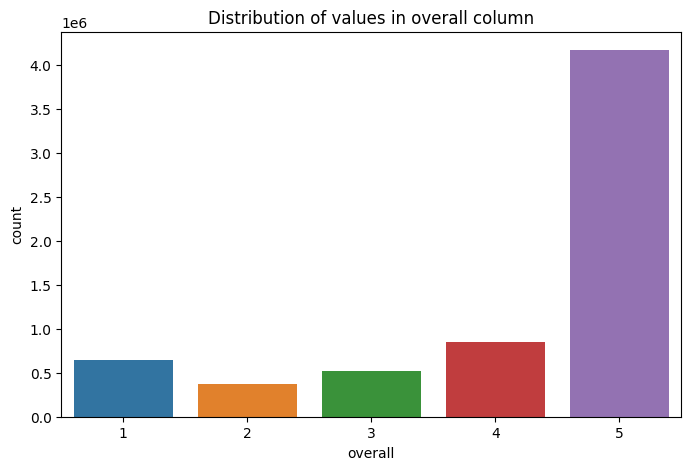

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='overall', data=df)
plt.title('Distribution of values in overall column')
plt.show()

#### Distribution of purchases over time

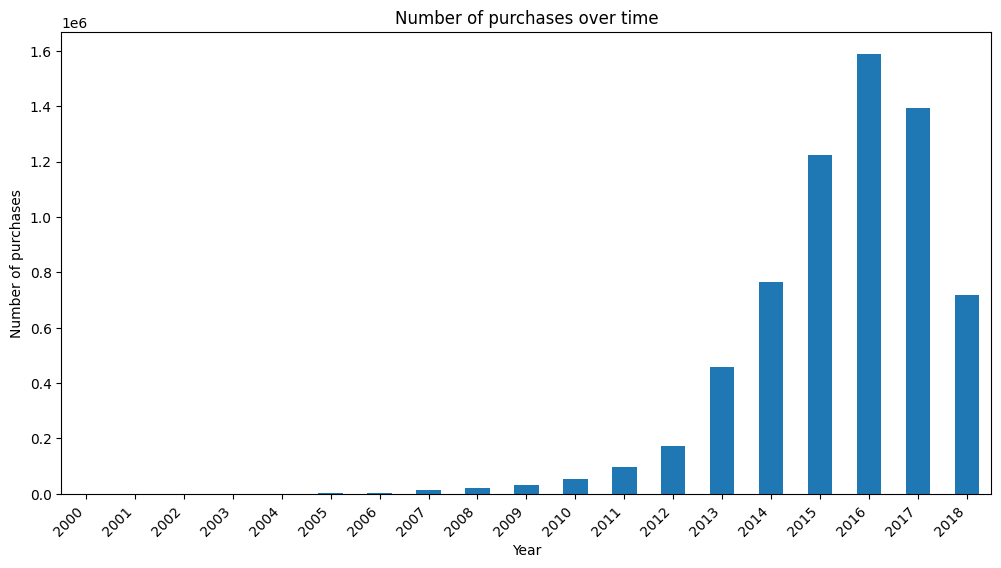

In [8]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
plt.figure(figsize=(12, 6))
df['reviewTime'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of purchases over time')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year')
plt.ylabel('Number of purchases')
plt.show()

#### Number of unique users

In [9]:
num_unique_users = df['reviewerID'].nunique()
print("Number of unique users:", num_unique_users)

Number of unique users: 3085591


#### 10 users who have the most purchases

In [10]:
user_counts = df['reviewerID'].value_counts()
user_counts_df = user_counts.reset_index()
user_counts_df.columns = ['reviewerID', 'numberOfPurchases']
user_counts_df.head(10)

,reviewerID,numberOfPurchases
0,A11OTLEDSW8ZXD,504
1,A8K5I4MF6QCGJ,310
2,A22CW0ZHY3NJH8,294
3,A3ICUM9JY3HLG3,293
4,A2GJX2KCUSR0EI,288
5,A2O421DTA8J0RW,241
6,A2M9GBUPEVJ5F7,229
7,A175XXVMLQA98A,221
8,A11FX8HL2ANK6T,214
9,A2A9X58G2GTBLP,211


#### How many purchases have how many users

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
user_purchases_counts = df.groupby('reviewerID').size()
purchases_distribution = user_purchases_counts.value_counts().sort_index()
purchases_df = purchases_distribution.reset_index()
purchases_df.columns = ['numberOfPurchases', 'numberOfUsers']
purchases_df

,numberOfPurchases,numberOfUsers
0,1,1930762
1,2,539142
2,3,232183
3,4,122717
4,5,74025
5,6,47318
6,7,31862
7,8,22412
8,9,16611
9,10,12445


In [13]:
new_data = []
ranges = [(11, 20), (21, 30), (31, 50), (51, 80), (81, 110), (111, 150), (151, 200), (201, float('inf'))]

for start, end in ranges:
    if end == float('inf'):
        users_range = purchases_df[purchases_df['numberOfPurchases'] >= start]
    else:
        users_range = purchases_df[(purchases_df['numberOfPurchases'] >= start) & (purchases_df['numberOfPurchases'] <= end)]
    num_users = users_range['numberOfUsers'].sum()
    new_data.append({'numberOfPurchases': f'{start} - {end}' if end != float('inf') else f'{start}+', 'numberOfUsers': int(num_users)})

new_df = pd.DataFrame(new_data)
first_10_rows = purchases_df[['numberOfPurchases', 'numberOfUsers']].head(10)
num_purchases_users = pd.concat([first_10_rows, new_df], ignore_index=True)

total_users = purchases_df['numberOfUsers'].sum()
num_purchases_users['percentageOfUsers'] = (num_purchases_users['numberOfUsers'] / total_users) * 100
num_purchases_users

,numberOfPurchases,numberOfUsers,percentageOfUsers
0,1,1930762,62.573491
1,2,539142,17.472893
2,3,232183,7.524750
3,4,122717,3.977099
4,5,74025,2.399054
5,6,47318,1.533515
6,7,31862,1.032606
7,8,22412,0.726344
8,9,16611,0.538341
9,10,12445,0.403326


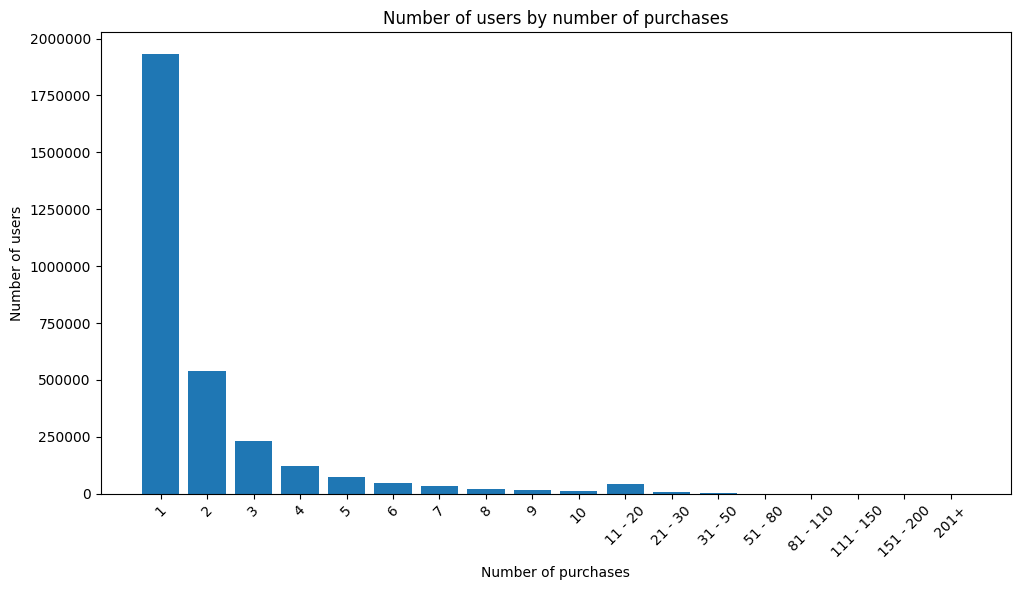

In [14]:
plt.figure(figsize=(10, 6))
positions = np.arange(len(num_purchases_users['numberOfPurchases']))
plt.bar(positions, num_purchases_users['numberOfUsers'])
plt.xlabel('Number of purchases')
plt.ylabel('Number of users')
plt.title('Number of users by number of purchases')
plt.xticks(positions, num_purchases_users['numberOfPurchases'], rotation=45)
plt.tight_layout()
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

#### Number of unique products purchased by users

In [15]:
num_unique_products = df['asin'].nunique()
print("Number of unique products purchased by users:", num_unique_products)

Number of unique products purchased by users: 198402


#### 10 products that were purchased the most times

In [16]:
product_counts = df['asin'].value_counts()
product_counts_df = product_counts.reset_index()
product_counts_df.columns = ['asin', 'numberOfPurchases']
product_counts_df.head(10)

,asin,numberOfPurchases
0,B000W5QSYA,26994
1,B000OX89XI,19216
2,B0009YD8OC,13216
3,B0013MVJPY,11830
4,B0012NV9NQ,11828
5,B000BQN9LA,11804
6,B00BJLS55G,11111
7,B0002DHXX2,10115
8,B0002I0O5G,9944
9,B000L3XYZ4,8822


# Products metadata dataset

In [17]:
meta_json_file_path = '/kaggle/input/meta-pet-supplies-json/meta_Pet_Supplies.json'

with open(meta_json_file_path, 'r') as file:
    first_line = file.readline().strip()
    first_row = json.loads(first_line)

print(json.dumps(first_row, indent=4))

{
    "category": [
        "Pet Supplies",
        "Dogs",
        "Health Supplies",
        "Hip &amp; Joint Care"
    ],
    "tech1": "",
    "description": [
        "Dr. Rexy hemp oil has powerful anti-inflammatory properties, which have shown to help relieve joint pain and achieve more mobility, agility and energy. Full spectrum hemp oil provides a natural calming effect which may help relieve stress, separation anxiety, travel issues, constant barking, natural aggressive behavior and fear of storms and anxiety related conditions. Made strictly with organic derived ingredients to provide the highest quality in health for your pets."
    ],
    "fit": "",
    "title": "DR.REXY Hemp Oil for Dogs and Cats - 100% Organic Food Supplement - Full Spectrum Hemp Extract - Pain Relief for Dogs &amp; Cats, Calming, Stress &amp; Anxiety Support, Wellness, Hip &amp; Joint Health - 250mg",
    "also_buy": [],
    "tech2": "",
    "brand": "DR.REXY",
    "feature": [
        "Made strictly wit

In [18]:
df_meta_json = pd.read_json(meta_json_file_path, lines=True)

print("Number of rows in the metadata dataset:", df_meta_json.shape[0])
print("Number of columns in the metadata dataset:", df_meta_json.shape[1])

Number of rows in the metadata dataset: 205999
Number of columns in the metadata dataset: 19


##### Displaying the first 5 rows of the metadata dataset

In [19]:
df_meta_json.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Pet Supplies, Dogs, Health Supplies, Hip &amp...",,[Dr. Rexy hemp oil has powerful anti-inflammat...,,DR.REXY Hemp Oil for Dogs and Cats - 100% Orga...,[],,DR.REXY,[Made strictly with organic derived ingredient...,"[>#93,463 in Grocery &amp; Gourmet Food (See T...",[],Amazon Home,,,$19.90,061539972X,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Pet Supplies, Dogs]",,[Know exactly what your dog is eating with 101...,,Pet Qwerks Treat Cookbook with Cutters,[],,Pet Qwerks,"[Recipe book, Cookie cutters, Indoor/outdoor use]","190,234 in Pet Supplies (","[B075DYQ1PH, 1604334657, 1604336919, 163026043...",Pet Supplies,,,$7.86,0615553605,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Pet Supplies, Dogs, Food, Dry]",,"[, , , ]",,The Best of 101 Dog Tricks,"[0760339740, 1592533256, 1592535305, 159253730...",,,[],"76,847 in Movies &amp; TV (","[1592533256, 0760339740, 1592537308, 159253530...",Movies &amp; TV,,,,0760339597,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,[],,"[, The venomous but beautiful scorpionfishes a...",,Lionfishes and Other Scorpionfishes: The Compl...,"[1911142186, 1514291983]",,Tfh/Nylabone,[Used Book in Good Condition],"435,039 in Pet Supplies (",[],Pet Supplies,,,$24.99,0793816793,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,"[Pet Supplies, Top Selection from AmazonPets]",,[Volume 1: 96 Words &amp; Phrases! This is the...,,Pet Media Feathered Phonics The Easy Way To Te...,"[B0002FP328, B0002FP32S, B0002FP32I, B00CAMARX...",,Pet Media,[Award-winning audio CD teaches parrots how to...,"52,435 in Pet Supplies (","[B0002FP328, B00CAMARXG, B0002FP32S, B0013L6CA...",Pet Supplies,,,$6.97,0972585419,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


#### As we can see, there is several columns which contain values of type list and since we need to work with these lists and also list type is unhashable type, we decided to convert .json file into .csv and work with this type of file on the basis that it is necessary for future work with the dataset

In [20]:
#df_meta.to_csv('meta_pet_supplies_csv.csv', index=False, escapechar='\\')

In [21]:
meta_csv_file_path = '/kaggle/input/meta-pet-supplies-csv/meta_pet_supplies_csv.csv'
df_meta = pd.read_csv(meta_csv_file_path)

print("Number of rows in the metadata dataset:", df_meta.shape[0])
print("Number of columns in the metadata dataset:", df_meta.shape[1])

Number of rows in the metadata dataset: 205999
Number of columns in the metadata dataset: 19


In [22]:
df_meta.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"['Pet Supplies', 'Dogs', 'Health Supplies', 'H...",NaN,['Dr. Rexy hemp oil has powerful anti-inflamma...,NaN,DR.REXY Hemp Oil for Dogs and Cats - 100% Orga...,[],NaN,DR.REXY,['Made strictly with organic derived ingredien...,"['>#93,463 in Grocery &amp; Gourmet Food (See ...",[],Amazon Home,NaN,NaN,$19.90,061539972X,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
1,"['Pet Supplies', 'Dogs']",NaN,['Know exactly what your dog is eating with 10...,NaN,Pet Qwerks Treat Cookbook with Cutters,[],NaN,Pet Qwerks,"['Recipe book', 'Cookie cutters', 'Indoor/outd...","190,234 in Pet Supplies (","['B075DYQ1PH', '1604334657', '1604336919', '16...",Pet Supplies,NaN,NaN,$7.86,0615553605,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
2,"['Pet Supplies', 'Dogs', 'Food', 'Dry']",NaN,"['', '', '', '']",NaN,The Best of 101 Dog Tricks,"['0760339740', '1592533256', '1592535305', '15...",NaN,NaN,[],"76,847 in Movies &amp; TV (","['1592533256', '0760339740', '1592537308', '15...",Movies &amp; TV,NaN,NaN,NaN,0760339597,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
3,[],NaN,"['', 'The venomous but beautiful scorpionfishe...",NaN,Lionfishes and Other Scorpionfishes: The Compl...,"['1911142186', '1514291983']",NaN,Tfh/Nylabone,['Used Book in Good Condition'],"435,039 in Pet Supplies (",[],Pet Supplies,NaN,NaN,$24.99,0793816793,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN
4,"['Pet Supplies', 'Top Selection from AmazonPets']",NaN,['Volume 1: 96 Words &amp; Phrases! This is th...,NaN,Pet Media Feathered Phonics The Easy Way To Te...,"['B0002FP328', 'B0002FP32S', 'B0002FP32I', 'B0...",NaN,Pet Media,['Award-winning audio CD teaches parrots how t...,"52,435 in Pet Supplies (","['B0002FP328', 'B00CAMARXG', 'B0002FP32S', 'B0...",Pet Supplies,NaN,NaN,$6.97,0972585419,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,NaN


#### Columns description

- category - list of categories the product belongs to
- tech1 - the first technical detail table of the product
- description - description of the product
- fit
- title - name of the product
- also_buy - related products
- tech2 - the second technical detail table of the product
- brand - brand name
- feature - bullet-point format features of the product
- rank - sales rank information
- also_view - related products
- main_cat - main category
- similar_item - similar products table
- date
- price - price in US dollars (at time of crawl)
- asin - ID of the product
- imageURL - url of the product image
- imageURLHighRes - url of the high resolution product image
- details - a dictionary of the product info

#### Data types in columns

In [23]:
df_meta.dtypes

category           object
tech1              object
description        object
fit                object
title              object
also_buy           object
tech2              object
brand              object
feature            object
rank               object
also_view          object
main_cat           object
similar_item       object
date               object
price              object
asin               object
imageURL           object
imageURLHighRes    object
details            object
dtype: object

#### Number of missing values in the columns

In [24]:
missing_values_meta_count = df_meta.isna().sum()
missing_values_meta_count

category                0
tech1              204777
description             0
fit                205807
title                   1
also_buy                0
tech2              205976
brand                1207
feature                 0
rank                    0
also_view               0
main_cat              498
similar_item       138707
date               202502
price              108739
asin                    0
imageURL                0
imageURLHighRes         0
details               131
dtype: int64

Also columns category, description, also_buy, also_view have missing values - although, there are arrays, but they are empty

#### Number of missing values in the category column

In [25]:
df_meta_category = df_meta.copy()

def clean_string(s):
    return s.replace("\\'", "'")

df_meta_category['category'] = df_meta_category['category'].apply(clean_string)
df_meta_category['category'] = df_meta_category['category'].apply(ast.literal_eval)
num_missing_category = df_meta_category['category'].apply(lambda x: len(x) == 0).sum()
print("Number of missing values in the category column:", num_missing_category)

Number of missing values in the category column: 16545


#### Number of categories (from category column)

#### Some of the categories have disturbed format - contain '\&amp;' instead of '&', so they are duplicated

#### For example: 
- Fish \&amp; Aquatic Pets - Fish & Aquatic Pets
- Cat Food \&amp; Supplies - Cat Food & Supplies

#### We will replace '\&amp;' with '&'

In [26]:
all_values = []

for index, row in df_meta_category.iterrows():
    all_values.extend(row['category'])

unique_values = list(set(all_values))
print('Number of categories:', len(unique_values))

unique_values = set(value.replace('&amp;', '&') for value in unique_values)
print('Number of unique categories after replacing &amp; with &:', len(unique_values))
print('Preview of the first 10 categories:\n', list(unique_values)[:10])

Number of categories: 1981
Number of unique categories after replacing &amp; with &: 1908
Preview of the first 10 categories:
 ['Double sized', 'Designed and Created For BlueSkyCreations', 'This set comes with 1 Gay Pride Flag Military dog tag, 1 Custom embossed Military Dog tag, 2 Stainless Chains(27" & 4.5") and 2 Tag-Z Brand Dog Tag Silencers', 'Black \\\\leather\\\\" jacket\\\\nDetailed hat"', 'Comes with a free 24" silver beaded chain', 'Squeak Toys', 'Cold Weather Coats', 'Small Heart Shape at Bottom', 'With a removable long strap, the carrier could be carried over your hand or shoulder.', 'This Batman dog costume comes in pet sizes Small, X-Large, Large, Medium.']


#### Number of unique products in meta dataset
#### and number of duplicated products

In [27]:
duplicated_products = df_meta[df_meta.duplicated()]
print('Number of unique products in meta dataset:', df_meta['asin'].nunique())
print('Number of duplicated products in meta dataset:', len(duplicated_products))

Number of unique products in meta dataset: 198265
Number of duplicated products in meta dataset: 7734


#### As we can see the number of unique products in meta dataset is 198265, however the number of unique products purchased by users from the purchases dataset is 198402, so there is a difference of 137
#### Check if all products from purchases dataset (df) are in meta dataset (df_meta)

In [28]:
asin_df = df['asin'].nunique()
asin_df_meta = df_meta['asin'].nunique()

not_in_df_meta = asin_df - asin_df_meta
print("Number of products which are in df, but not in df_meta:", not_in_df_meta)

Number of products which are in df, but not in df_meta: 137
